In [1]:
import pandas as pd
import numpy as np
import pyarrow.dataset as ds

path = "../data/silver/sales"
dataset = ds.dataset(path, format="parquet", partitioning="hive")
df = dataset.to_table().to_pandas()

df.head()


,sales_id,store_id,product_id,ts,qty,price,discount,revenue,year,month,day
0,9,4,45,2023-01-21,8,372.00,0.220,2321.04,2023,1,21
1,34,5,27,2023-10-14,18,171.61,0.197,2480.18,2023,10,14
2,8,8,25,2023-10-20,11,13.56,0.091,135.65,2023,10,20
3,13,5,49,2023-11-17,17,458.18,0.135,6736.18,2023,11,17
4,44,2,20,2023-12-05,12,369.29,0.037,4268.93,2023,12,5


In [2]:
df.dtypes, df.shape

(sales_id               int64
 store_id               int64
 product_id             int64
 ts            datetime64[ns]
 qty                    int64
 price                float64
 discount             float64
 revenue              float64
 year                   int32
 month                  int32
 day                    int32
 dtype: object,
 (50, 11))

In [3]:
df[["qty", "price","discount","revenue"]].describe().T

,count,mean,std,min,25%,50%,75%,max
qty,50.0,9.84000,5.790069,1.000,5.25000,8.5000,15.75000,20.000
price,50.0,271.20280,155.127121,13.560,135.04000,251.8350,414.54500,498.150
discount,50.0,0.16408,0.074065,0.024,0.11025,0.1615,0.22325,0.283
revenue,50.0,2223.07600,1910.949994,27.450,585.33750,1833.2750,3388.73500,7981.080


In [4]:
df.isna().sum().sort_values(ascending=False)

sales_id      0
store_id      0
product_id    0
ts            0
qty           0
price         0
discount      0
revenue       0
year          0
month         0
day           0
dtype: int64

In [5]:
df["sales_id"].duplicated().sum()

np.int64(0)

In [6]:
df["ts"].min(),df["ts"].max()

(Timestamp('2023-01-21 00:00:00'), Timestamp('2025-08-29 00:00:00'))

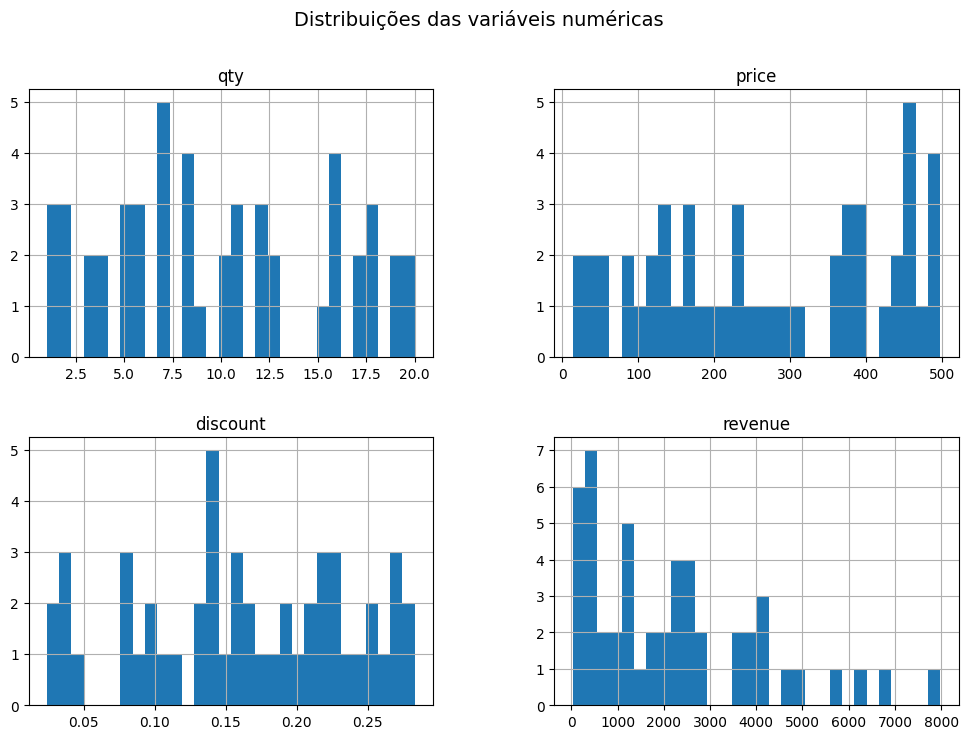

In [7]:
import matplotlib.pyplot as plt
from pathlib import Path

Path("../reports/eda").mkdir(parents=True, exist_ok=True)

df[["qty", "price", "discount", "revenue"]].hist(
    bins=30, figsize=(12,8), layout=(2,2)
)
plt.suptitle("Distribuições das variáveis numéricas", fontsize=14)
plt.savefig("../reports/eda/distribuicoes.png")
plt.show()

C:\Users\Netto\AppData\Local\Temp\ipykernel_10624\2087474085.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df.set_index("ts").resample("M")["revenue"].sum().plot(


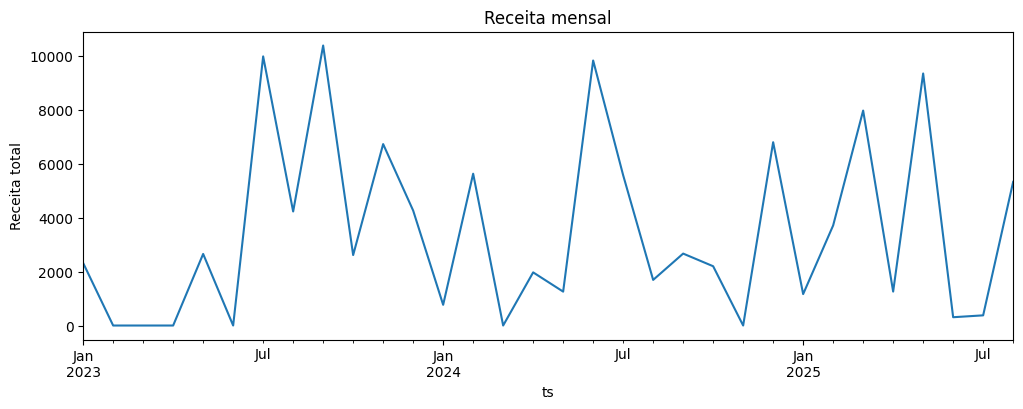

In [8]:
df.set_index("ts").resample("M")["revenue"].sum().plot(
    figsize=(12,4),title="Receita mensal"   
)
plt.ylabel("Receita total")
plt.savefig("../reports/eda/receita_mensal.png")
plt.show()

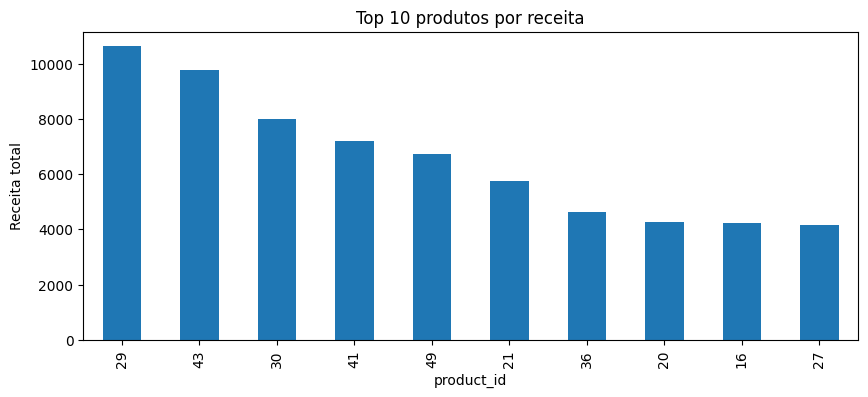

In [9]:
top_products = (
    df.groupby("product_id")["revenue"]
    .sum()
    .sort_values(ascending=False)
    .head(10)
)
top_products.plot(kind="bar",figsize=(10,4),title="Top 10 produtos por receita")
plt.ylabel("Receita total")
plt.savefig("../reports/eda/top_produtos.png")
plt.show()

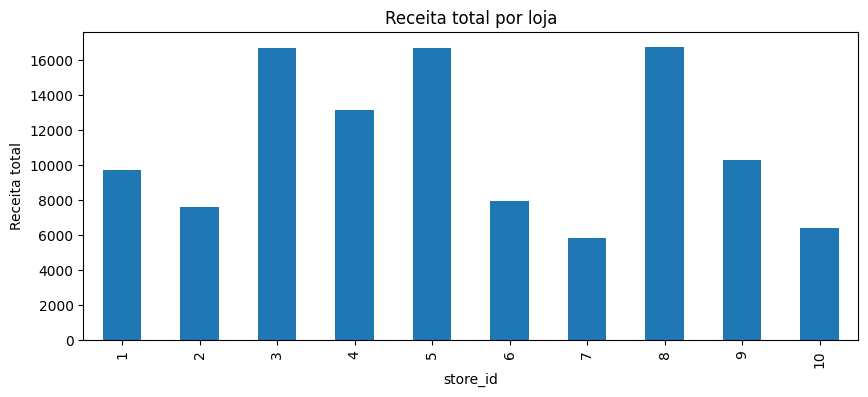

In [10]:
df.groupby("store_id")["revenue"].sum().plot(kind="bar",figsize=(10,4),title="Receita total por loja")
plt.ylabel("Receita total")
plt.savefig("../reports/eda/receita_lojas.png")
plt.show()